<a href="https://colab.research.google.com/github/saidabroor/Database_class/blob/main/Copy_of_week13_DB_Time_Series_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SQLite Pandas Examples

In [ ]:
import sqlite3 as sl
con = sl.connect('my-test.db')

**Using SQLite as a Time Series Database**
SQLite supports five *date* and *time* functions as follows:


1.   date(timestring, modifier, modifier, ...)
2.   time(timestring, modifier, modifier, ...)
3. datetime(timestring, modifier, modifier, ...)
4. julianday(timestring, modifier, modifier, ...)
5. strftime(format, timestring, modifier, modifier, ...)

All five date and time functions take a time string as an argument. The time string is followed by zero or more modifiers. The strftime() function also takes a format string as its first argument. With these date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

In this subsection, we will create a table to save man-made temperature data at different dates and times. You can presume that they are collected from some kind of temperature sensors.

This subsection notebook will present:



*   Practice date and time functions
*   Create a temperature table and index
*   Insert data into the temperature table
*   Query







In [ ]:
%load_ext sql
from random import uniform, choice
import time
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline

1. **Connect to database**

---


It was mentioned before the demo.db3 is extracted from a hydrological modelling. As a result, the data in each table is tidy and complete without NULL values. However, we can create a table with NULL values for demo.

In [ ]:
%sql sqlite:///demo.db3

'Connected: @demo.db3'

2. **Play with date and time functions**

---


You can find more example from lang_datefunc or sqlite_date_time

**Compute the current date.**

In [ ]:
%sql SELECT date('now');

 * sqlite:///demo.db3
Done.


date('now')
2022-11-24


**Compute the last day of the current month.**

In [ ]:
%sql SELECT date('now','start of month','+1 month','-1 day');

 * sqlite:///demo.db3
Done.


"date('now','start of month','+1 month','-1 day')"
2022-11-30


3. **Create a table of time series temperature**

---


3.1 Create table
only with two columns of timestamp and Temperature

In [ ]:
%%sql sqlite://
DROP TABLE IF EXISTS Temperature;
CREATE TABLE Temperature (Timestamp DATETIME NOT NULL, Temperature NUMERIC NOT NULL)

Done.
Done.


[]

3.2 **Create an index:** 
For efficient querying, we'll want to index the timestamp column.

In [ ]:
%%sql sqlite://
CREATE UNIQUE INDEX idx_timestamp ON Temperature (Timestamp);

Done.


[]

3.3 **Insert data**: Make 500 rows of data and temperature ranges between 18 to 26.

In [ ]:
def dt(days):
    return timedelta(days=days)

N_rows = 500
now = datetime.now()

for i in range(N_rows):
    timestamp = now - dt(days=(N_rows - i))
    temperature = uniform(18, 26)
    %sql INSERT INTO Temperature VALUES (:timestamp, :temperature); 

 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 rows affected.
 * sqlite:///demo.db3
1 r

4. **Play with time series table**: 4.1 Simple Query

In [ ]:
%sql SELECT datetime(Timestamp) as Date, Temperature FROM Temperature LIMIT 5

 * sqlite:///demo.db3
Done.


Date,Temperature
2021-07-12 07:41:22,23.86565574715023
2021-07-13 07:41:22,21.339427892484913
2021-07-14 07:41:22,25.41260587962434
2021-07-15 07:41:22,19.135464778236937
2021-07-16 07:41:22,22.49079956287906


4.2 Filter with a datetime

In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature
FROM Temperature
WHERE Date <= '2022-06-31 14:21:45'

Done.


Date,Temperature
2021-07-12 07:41:22.992757,23.86565574715023
2021-07-13 07:41:22.992757,21.339427892484913
2021-07-14 07:41:22.992757,25.41260587962434
2021-07-15 07:41:22.992757,19.135464778236937
2021-07-16 07:41:22.992757,22.49079956287906
2021-07-17 07:41:22.992757,24.219849285163306
2021-07-18 07:41:22.992757,21.491240537928377
2021-07-19 07:41:22.992757,20.21980687996348
2021-07-20 07:41:22.992757,20.840720314044916
2021-07-21 07:41:22.992757,21.634444478717874


4.3 Query data at a specific year
Use CAST string to integer as strftime returns a string.

In [ ]:
%%sql sqlite://
SELECT Timestamp as Date, Temperature 
FROM Temperature
WHERE CAST(strftime('%Y', Date) as Int) = 2021

Done.


Date,Temperature
2021-07-12 07:41:22.992757,23.86565574715023
2021-07-13 07:41:22.992757,21.339427892484913
2021-07-14 07:41:22.992757,25.41260587962434
2021-07-15 07:41:22.992757,19.135464778236937
2021-07-16 07:41:22.992757,22.49079956287906
2021-07-17 07:41:22.992757,24.219849285163306
2021-07-18 07:41:22.992757,21.491240537928377
2021-07-19 07:41:22.992757,20.21980687996348
2021-07-20 07:41:22.992757,20.840720314044916
2021-07-21 07:41:22.992757,21.634444478717874


4.5 Aggregate yearly

In [ ]:
%%sql sqlite://
SELECT strftime('%Y', Timestamp) as Year, 
       AVG(Temperature) AS MEAN_TMP,
       MAX(Temperature) AS MAX_TMP,
       MIN(Temperature) AS MIN_TMP
FROM Temperature
GROUP BY strftime('%Y', Timestamp)

Done.


Year,MEAN_TMP,MAX_TMP,MIN_TMP
2021,21.65828150557464,25.951800865671217,18.016127955614994
2022,21.993063521837115,25.987285026993266,18.00487836638019


5. **Visualization**: Here we convert SQL query results into Pandas DataFrame.

In [ ]:
ts = %sql SELECT datetime(Timestamp) as date, Temperature FROM Temperature
df = ts.DataFrame()
df.set_index("date", inplace = True) 
df.index = pd.to_datetime(df.index)
df.index

 * sqlite:///demo.db3
Done.


DatetimeIndex(['2021-07-12 07:41:22', '2021-07-13 07:41:22',
               '2021-07-14 07:41:22', '2021-07-15 07:41:22',
               '2021-07-16 07:41:22', '2021-07-17 07:41:22',
               '2021-07-18 07:41:22', '2021-07-19 07:41:22',
               '2021-07-20 07:41:22', '2021-07-21 07:41:22',
               ...
               '2022-11-14 07:41:22', '2022-11-15 07:41:22',
               '2022-11-16 07:41:22', '2022-11-17 07:41:22',
               '2022-11-18 07:41:22', '2022-11-19 07:41:22',
               '2022-11-20 07:41:22', '2022-11-21 07:41:22',
               '2022-11-22 07:41:22', '2022-11-23 07:41:22'],
              dtype='datetime64[ns]', name='date', length=500, freq=None)

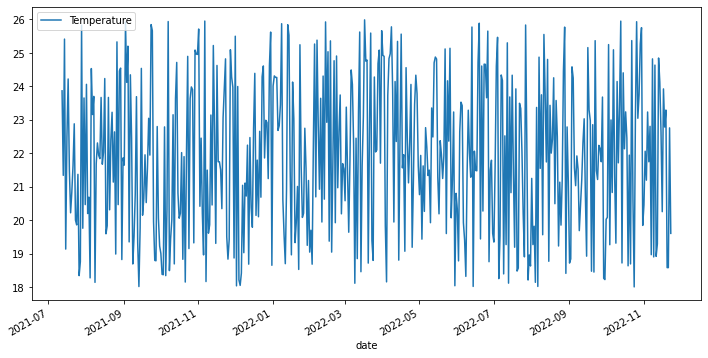

In [ ]:
df.plot(figsize=(12, 6))

**Summary and References**

---


Time series databases (TSDBs) are getting popular these days. There are quite a few TSDbs such as InfluxDB, Graphite, Druid, Kairos, and Prometheus. With the SQLite date and time functions, we can save time series data into a SQLite database so as to use SQLite as a time series database.

Ref: https://www.sqlite.org/lang_datefunc.html